In [1]:
import PIL
import PIL.Image as Image
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import torch

import pathlib
import functools

Look at resolution of the images

In [2]:
import PIL.Image


img_res = set()
imgs_path = pathlib.Path("Pascal-part/JPEGImages")
masks_path = pathlib.Path("Pascal-part/gt_masks")

for img_path in imgs_path.iterdir():
    image = PIL.Image.open(img_path)
    img_res.add(image.size)

print(img_res)

{(500, 444), (500, 453), (301, 500), (336, 448), (500, 300), (500, 309), (500, 318), (500, 327), (500, 336), (419, 500), (500, 421), (360, 270), (500, 430), (380, 285), (500, 448), (500, 457), (361, 500), (500, 295), (500, 304), (500, 313), (500, 322), (323, 500), (500, 169), (470, 317), (480, 438), (380, 500), (391, 500), (402, 500), (500, 416), (500, 425), (303, 396), (500, 443), (352, 288), (459, 500), (353, 500), (342, 500), (500, 281), (498, 500), (500, 290), (480, 321), (500, 308), (421, 500), (461, 307), (350, 467), (500, 402), (255, 324), (500, 411), (500, 420), (372, 500), (383, 500), (500, 429), (324, 432), (320, 480), (373, 473), (288, 384), (334, 500), (345, 500), (380, 378), (490, 500), (500, 294), (500, 388), (312, 188), (380, 481), (452, 500), (500, 397), (500, 406), (320, 448), (500, 415), (320, 457), (341, 251), (295, 382), (500, 424), (288, 352), (269, 500), (500, 280), (386, 267), (480, 320), (326, 500), (471, 500), (460, 500), (448, 336), (356, 500), (500, 383), (27

In [3]:
print(min(img_res))
print(np.mean(list(img_res), axis=0))

(191, 500)
[426.40983607 402.32552693]


Look at the samples

In [4]:
classes = {
    0: "bg",
    1: "low_hand",
    2: "torso",
    3: "low_leg",
    4: "head",
    5: "up_leg",
    6: "up_hand"
}

In [14]:
num_examples = 10
img_names = np.array([img_file.stem for img_file in imgs_path.iterdir()])
np.random.shuffle(img_names)
img_names = img_names[:num_examples]

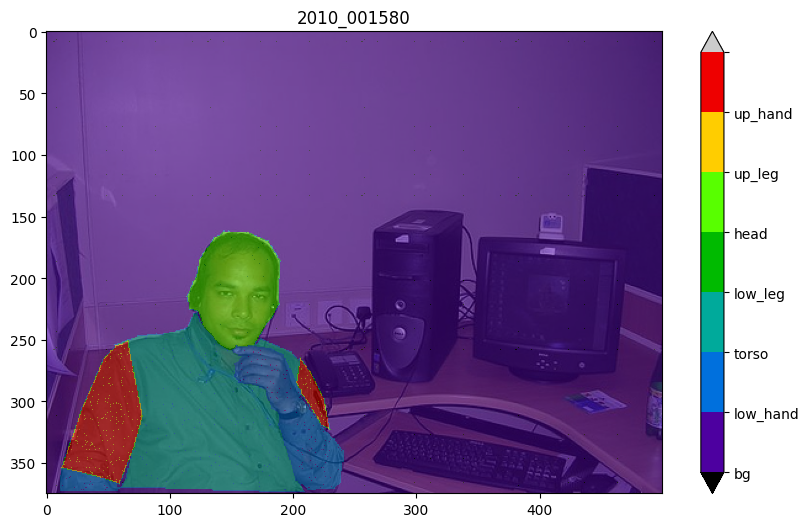

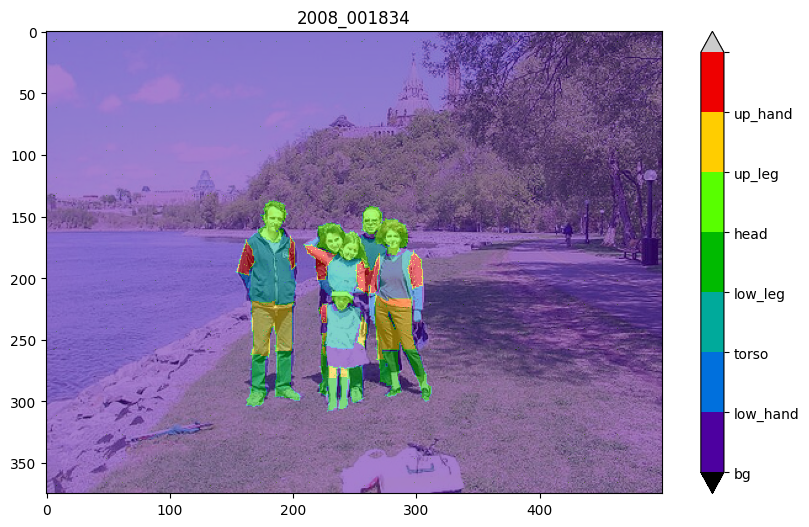

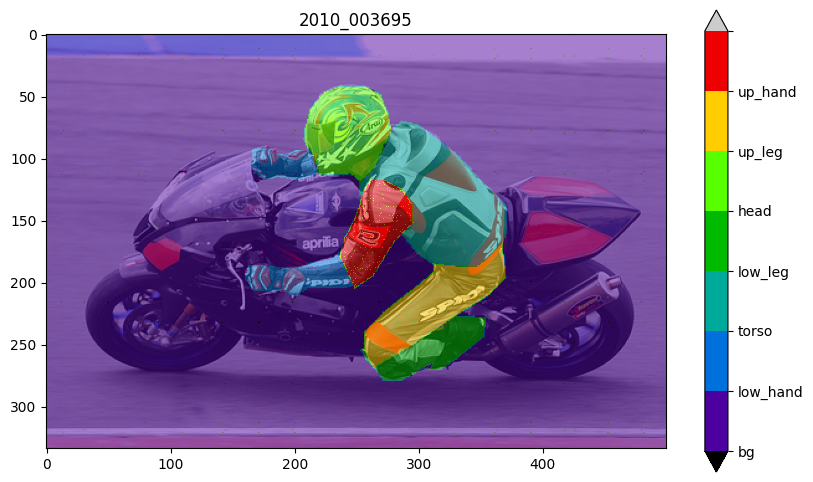

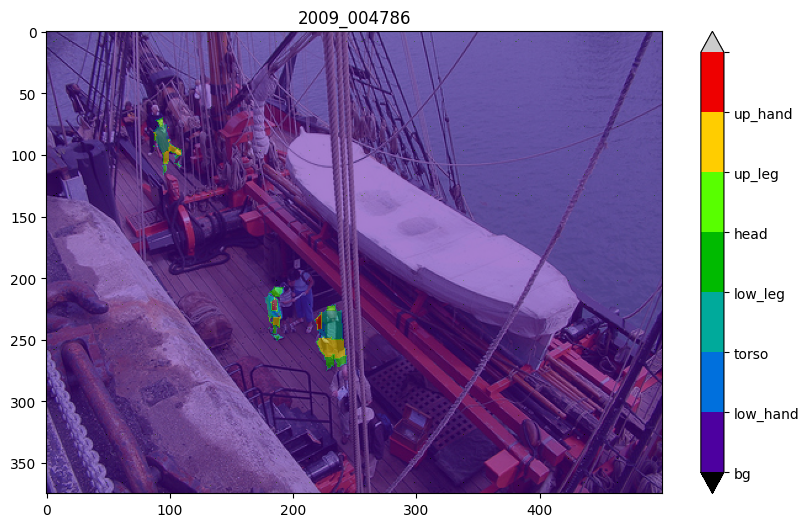

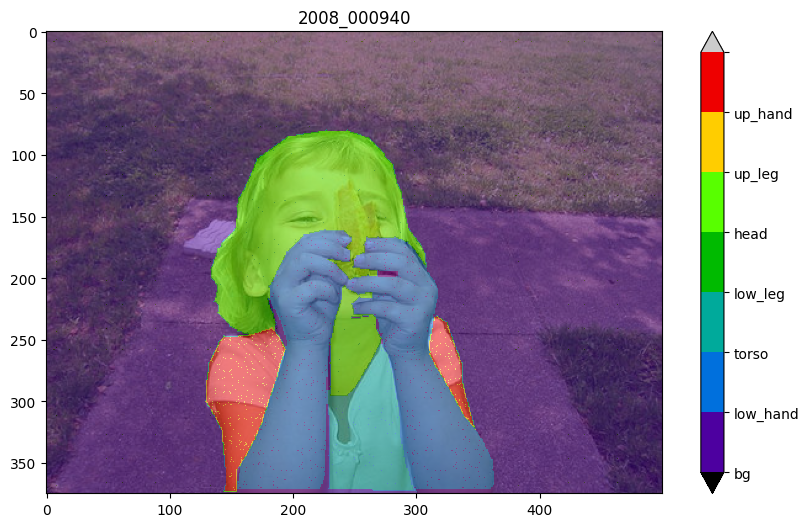

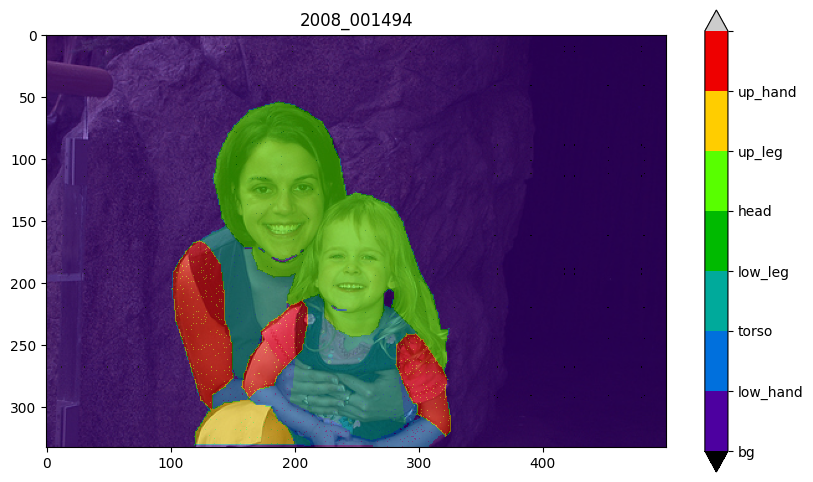

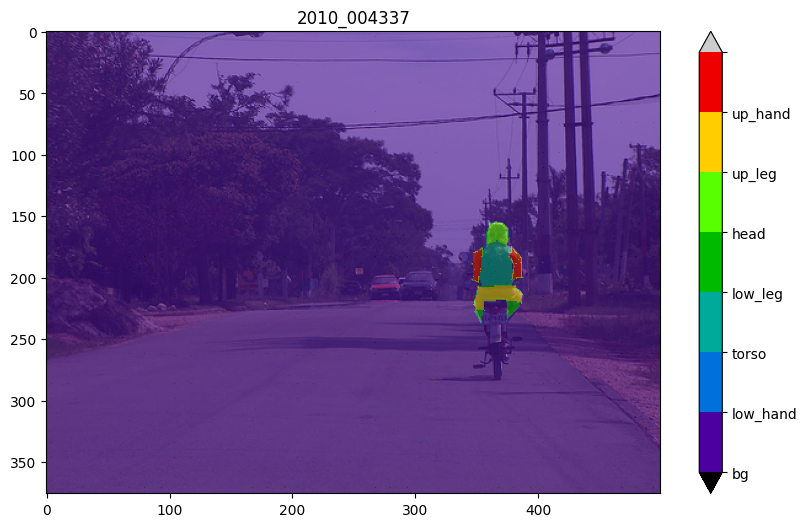

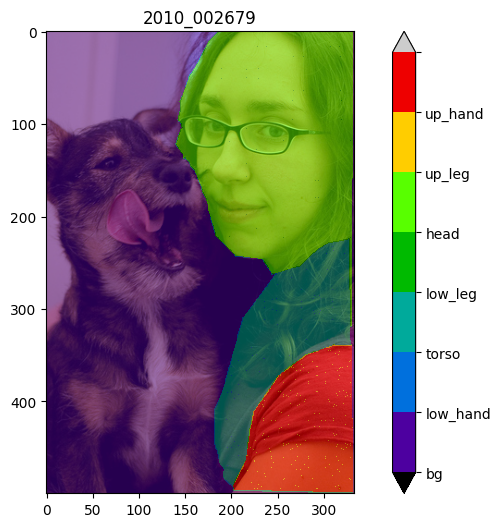

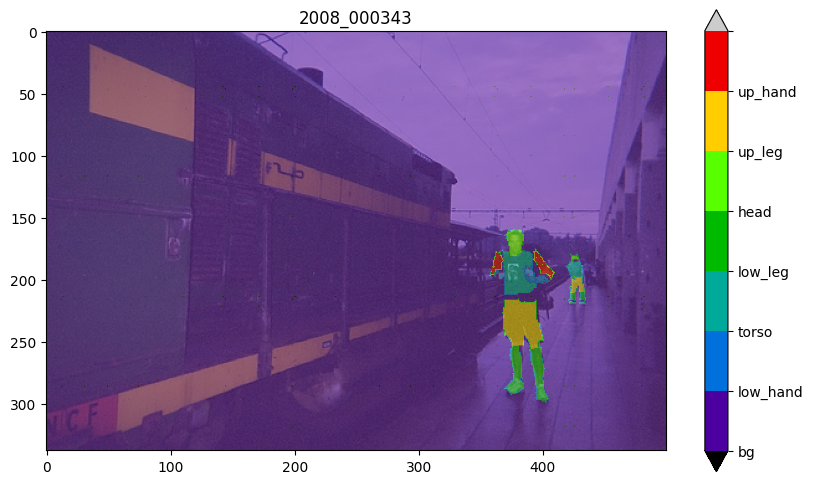

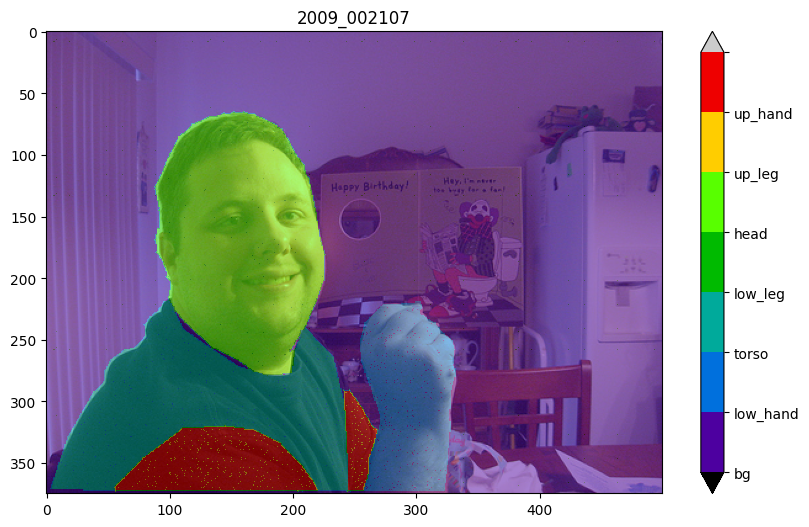

In [15]:
for img_name in img_names:
    img_name = str(img_name)
    img = PIL.Image.open(imgs_path / pathlib.Path(img_name + ".jpg"))
    mask = np.load(masks_path / pathlib.Path(img_name + ".npy"))

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.imshow(img)

    # make colorbar
    cmap = mpl.cm.nipy_spectral
    bounds = list(range(len(classes) + 1))
    norm =  mpl.colors.BoundaryNorm(bounds, cmap.N, extend="both")
    # draw mask
    ax.imshow(
        mask,
        cmap=cmap,
        norm=norm,
        alpha=0.5
    )
    # draw colorbar
    colorbar = fig.colorbar(
        mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
        ax=ax, orientation='vertical'
    )
    colorbar.set_ticklabels(list(classes.values()) + [" "])

    ax.set_title(img_name)

In [ ]:
import albumentations as A

img_name = "2008_000650"
img = PIL.Image.open(imgs_path / pathlib.Path(img_name + ".jpg"))
img = np.array(img)
img = A.ToRGB().apply(img)
fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(img)